### Este script es una análisis exploratorio de datos de AGN (Las galaxias anfitrionas de núcleos galácticos activos), disponibles en 
https://wwwmpa.mpa-garching.mpg.de/SDSS/DR4/Data/agncatalogue.html

### Descripción de las columnas:
https://wwwmpa.mpa-garching.mpg.de/SDSS/DR4/Data/agn.cat_dr2_desc.txt 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import warnings

In [1]:

scaler = StandardScaler()
os.chdir('/Users/benx/Documents/PythonCodes/AstronomicalData/Datos') #Reemplazar con directorio adecuado

%matplotlib inline

name = ['idpl', 'mjd', 'ifib', 'ra', 'dec', 'zz', 'o3lum', 'o3corr','bpt1','bpt2',
        'rm150','rmu','con','d4n','HdA','vdisp' ]

AGN = pd.read_csv('AGN.csv', names=name, sep=',')


In [2]:
# Silenciar FutureWarnings
#Activar solo si estamos seguros de que no tendremos warnings importantes
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
AGN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88178 entries, 0 to 88177
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idpl    88178 non-null  int64  
 1   mjd     88178 non-null  int64  
 2   ifib    88178 non-null  int64  
 3   ra      88178 non-null  float64
 4   dec     88178 non-null  float64
 5   zz      88178 non-null  object 
 6   o3lum   88178 non-null  object 
 7   o3corr  88178 non-null  float64
 8   bpt1    88178 non-null  float64
 9   bpt2    88178 non-null  float64
 10  rm150   88178 non-null  object 
 11  rmu     88178 non-null  float64
 12  con     88178 non-null  float64
 13  d4n     88178 non-null  float64
 14  HdA     88178 non-null  float64
 15  vdisp   88178 non-null  float64
dtypes: float64(10), int64(3), object(3)
memory usage: 10.8+ MB


In [4]:
#Tuvimos errores para estandarizar los datos
#al verificar la información del df, algunas columnas eran del tipo 'object'
#con estas líneas, las transformamos en numéricas
AGN['zz'] = pd.to_numeric(AGN['zz'], errors='coerce')
AGN['o3lum'] = pd.to_numeric(AGN['o3lum'], errors='coerce')
AGN['rm150'] = pd.to_numeric(AGN['zz'], errors='coerce')

In [5]:
#Verificamos con la info, que todas las columnas sean numeros
AGN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88178 entries, 0 to 88177
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idpl    88178 non-null  int64  
 1   mjd     88178 non-null  int64  
 2   ifib    88178 non-null  int64  
 3   ra      88178 non-null  float64
 4   dec     88178 non-null  float64
 5   zz      88113 non-null  float64
 6   o3lum   88092 non-null  float64
 7   o3corr  88178 non-null  float64
 8   bpt1    88178 non-null  float64
 9   bpt2    88178 non-null  float64
 10  rm150   88113 non-null  float64
 11  rmu     88178 non-null  float64
 12  con     88178 non-null  float64
 13  d4n     88178 non-null  float64
 14  HdA     88178 non-null  float64
 15  vdisp   88178 non-null  float64
dtypes: float64(13), int64(3)
memory usage: 10.8 MB


In [6]:
#Visuzalizamos el df
AGN

idpl    mjd  ifib         ra       dec       zz   o3lum  o3corr  \
0       266  51630     1  146.71420  -1.04130  0.02125  5.2482  5.7125   
1       266  51630     4  146.62857  -0.76514  0.06467  5.7124  6.0801   
2       266  51630    13  146.96350  -0.75935  0.09708  6.0660  6.8626   
3       266  51630    25  146.95607  -0.34230  0.13471  6.3762  6.5130   
4       266  51630    36  147.32951   0.02890  0.04810  5.8926  7.0795   
...     ...    ...   ...        ...       ...      ...     ...     ...   
88173   483  51924   572  136.46706  57.06212  0.10051  6.0939  6.8244   
88174   483  51924   577  136.04558  57.32555  0.09998  5.5679  6.5130   
88175   483  51924   596  135.65746  58.18495  0.09989  5.7054  6.6811   
88176   483  51924   597  135.44250  57.76846  0.09909  6.1611  6.2686   
88177   483  51924   602  137.08092  57.05923  0.14555  6.6666  7.4548   

         bpt1    bpt2    rm150      rmu     con     d4n     HdA      vdisp  
0     -0.2674 -0.3373  0.02125  9.11405  2.8776  1.6012  2.0913  147.30460  
1     -0.1348 -0.3173  0.06467  8.99325  2.9198  1.7026 -0.6056  133.34019  
2      0.5122 -0.1473  0.09708  8.61370  2.9466  1.4692  2.2305   72.82800  
3     -0.1035 -0.1262  0.13471  9.01417  2.9318  1.8010 -1.5124  226.98100  
4     -0.2197 -0.1444  0.04810  8.78895  2.7084  1.4231  2.9383  104.60770  
...       ...     ...      ...      ...     ...     ...     ...        ...  
88173 -0.1669 -0.2811  0.10051  8.70627  2.4216  1.5201  3.2171  150.81560  
88174 -0.1147 -0.2369  0.09998  8.34447  2.8721  1.4342  3.3607  174.43600  
88175 -0.3476 -0.2943  0.09989  8.93435  2.5017  1.6258  2.1943  123.54000  
88176 -0.0465 -0.2937  0.09909  9.29856  2.7634  2.0288 -2.9102  247.86591  
88177  0.4454 -0.0077  0.14555  9.00888  2.6479  1.7657 -0.0474  197.65590  

[88178 rows x 16 columns]

In [7]:
AGN[name] = scaler.fit_transform(AGN[name])

In [8]:
AGN

idpl       mjd      ifib        ra       dec        zz     o3lum  \
0     -1.537489 -1.898415 -1.766827 -0.407994 -1.197295 -1.878785 -1.687155   
1     -1.537489 -1.898415 -1.750457 -0.409111 -1.185186 -0.907076 -0.848796   
2     -1.537489 -1.898415 -1.701347 -0.404744 -1.184932 -0.181763 -0.210183   
3     -1.537489 -1.898415 -1.635866 -0.404841 -1.166646  0.660370  0.350047   
4     -1.537489 -1.898415 -1.575842 -0.399971 -1.150370 -1.277901 -0.523349   
...         ...       ...       ...       ...       ...       ...       ...   
88173 -1.022869 -1.224788  1.348957 -0.541612  1.350332 -0.105002 -0.159795   
88174 -1.022869 -1.224788  1.376240 -0.547108  1.361882 -0.116863 -1.109767   
88175 -1.022869 -1.224788  1.479918 -0.552169  1.399564 -0.118877 -0.861438   
88176 -1.022869 -1.224788  1.485375 -0.554972  1.381303 -0.136780 -0.038430   
88177 -1.022869 -1.224788  1.512658 -0.533608  1.350205  0.902962  0.874519   

         o3corr      bpt1      bpt2     rm150       rmu       con       d4n  \
0     -1.261488 -0.166143 -1.131707 -1.878785  0.950828  0.568563 -0.296486   
1     -0.837759 -0.156555 -1.017719 -0.907076  0.605760  0.687348  0.186270   
2      0.064221 -0.109772 -0.048822 -0.181763 -0.478432  0.762786 -0.924925   
3     -0.338759 -0.154292  0.071435  0.660370  0.665519  0.721126  0.654743   
4      0.314240 -0.162694 -0.032294 -1.277901  0.022173  0.092293 -1.144403   
...         ...       ...       ...       ...       ...       ...       ...   
88173  0.020189 -0.158877 -0.811401 -0.105002 -0.214004 -0.715000 -0.682595   
88174 -0.338759 -0.155102 -0.559488 -0.116863 -1.247493  0.553081 -1.091557   
88175 -0.144992 -0.171943 -0.886633 -0.118877  0.437511 -0.489532 -0.179368   
88176 -0.620477 -0.150171 -0.883213 -0.136780  1.477885  0.247109  1.739277   
88177  0.746845 -0.114602  0.746814  0.902962  0.650408 -0.078004  0.486683   

            HdA     vdisp  
0      0.571546  0.100448  
1     -0.635132 -0.172569  
2      0.633828 -1.355638  
3     -1.040862  1.658196  
4      0.950520 -0.734316  
...         ...       ...  
88173  1.075264  0.169092  
88174  1.139515  0.630893  
88175  0.617631 -0.364172  
88176 -1.666282  2.066516  
88177 -0.385375  1.084863  

[88178 rows x 16 columns]

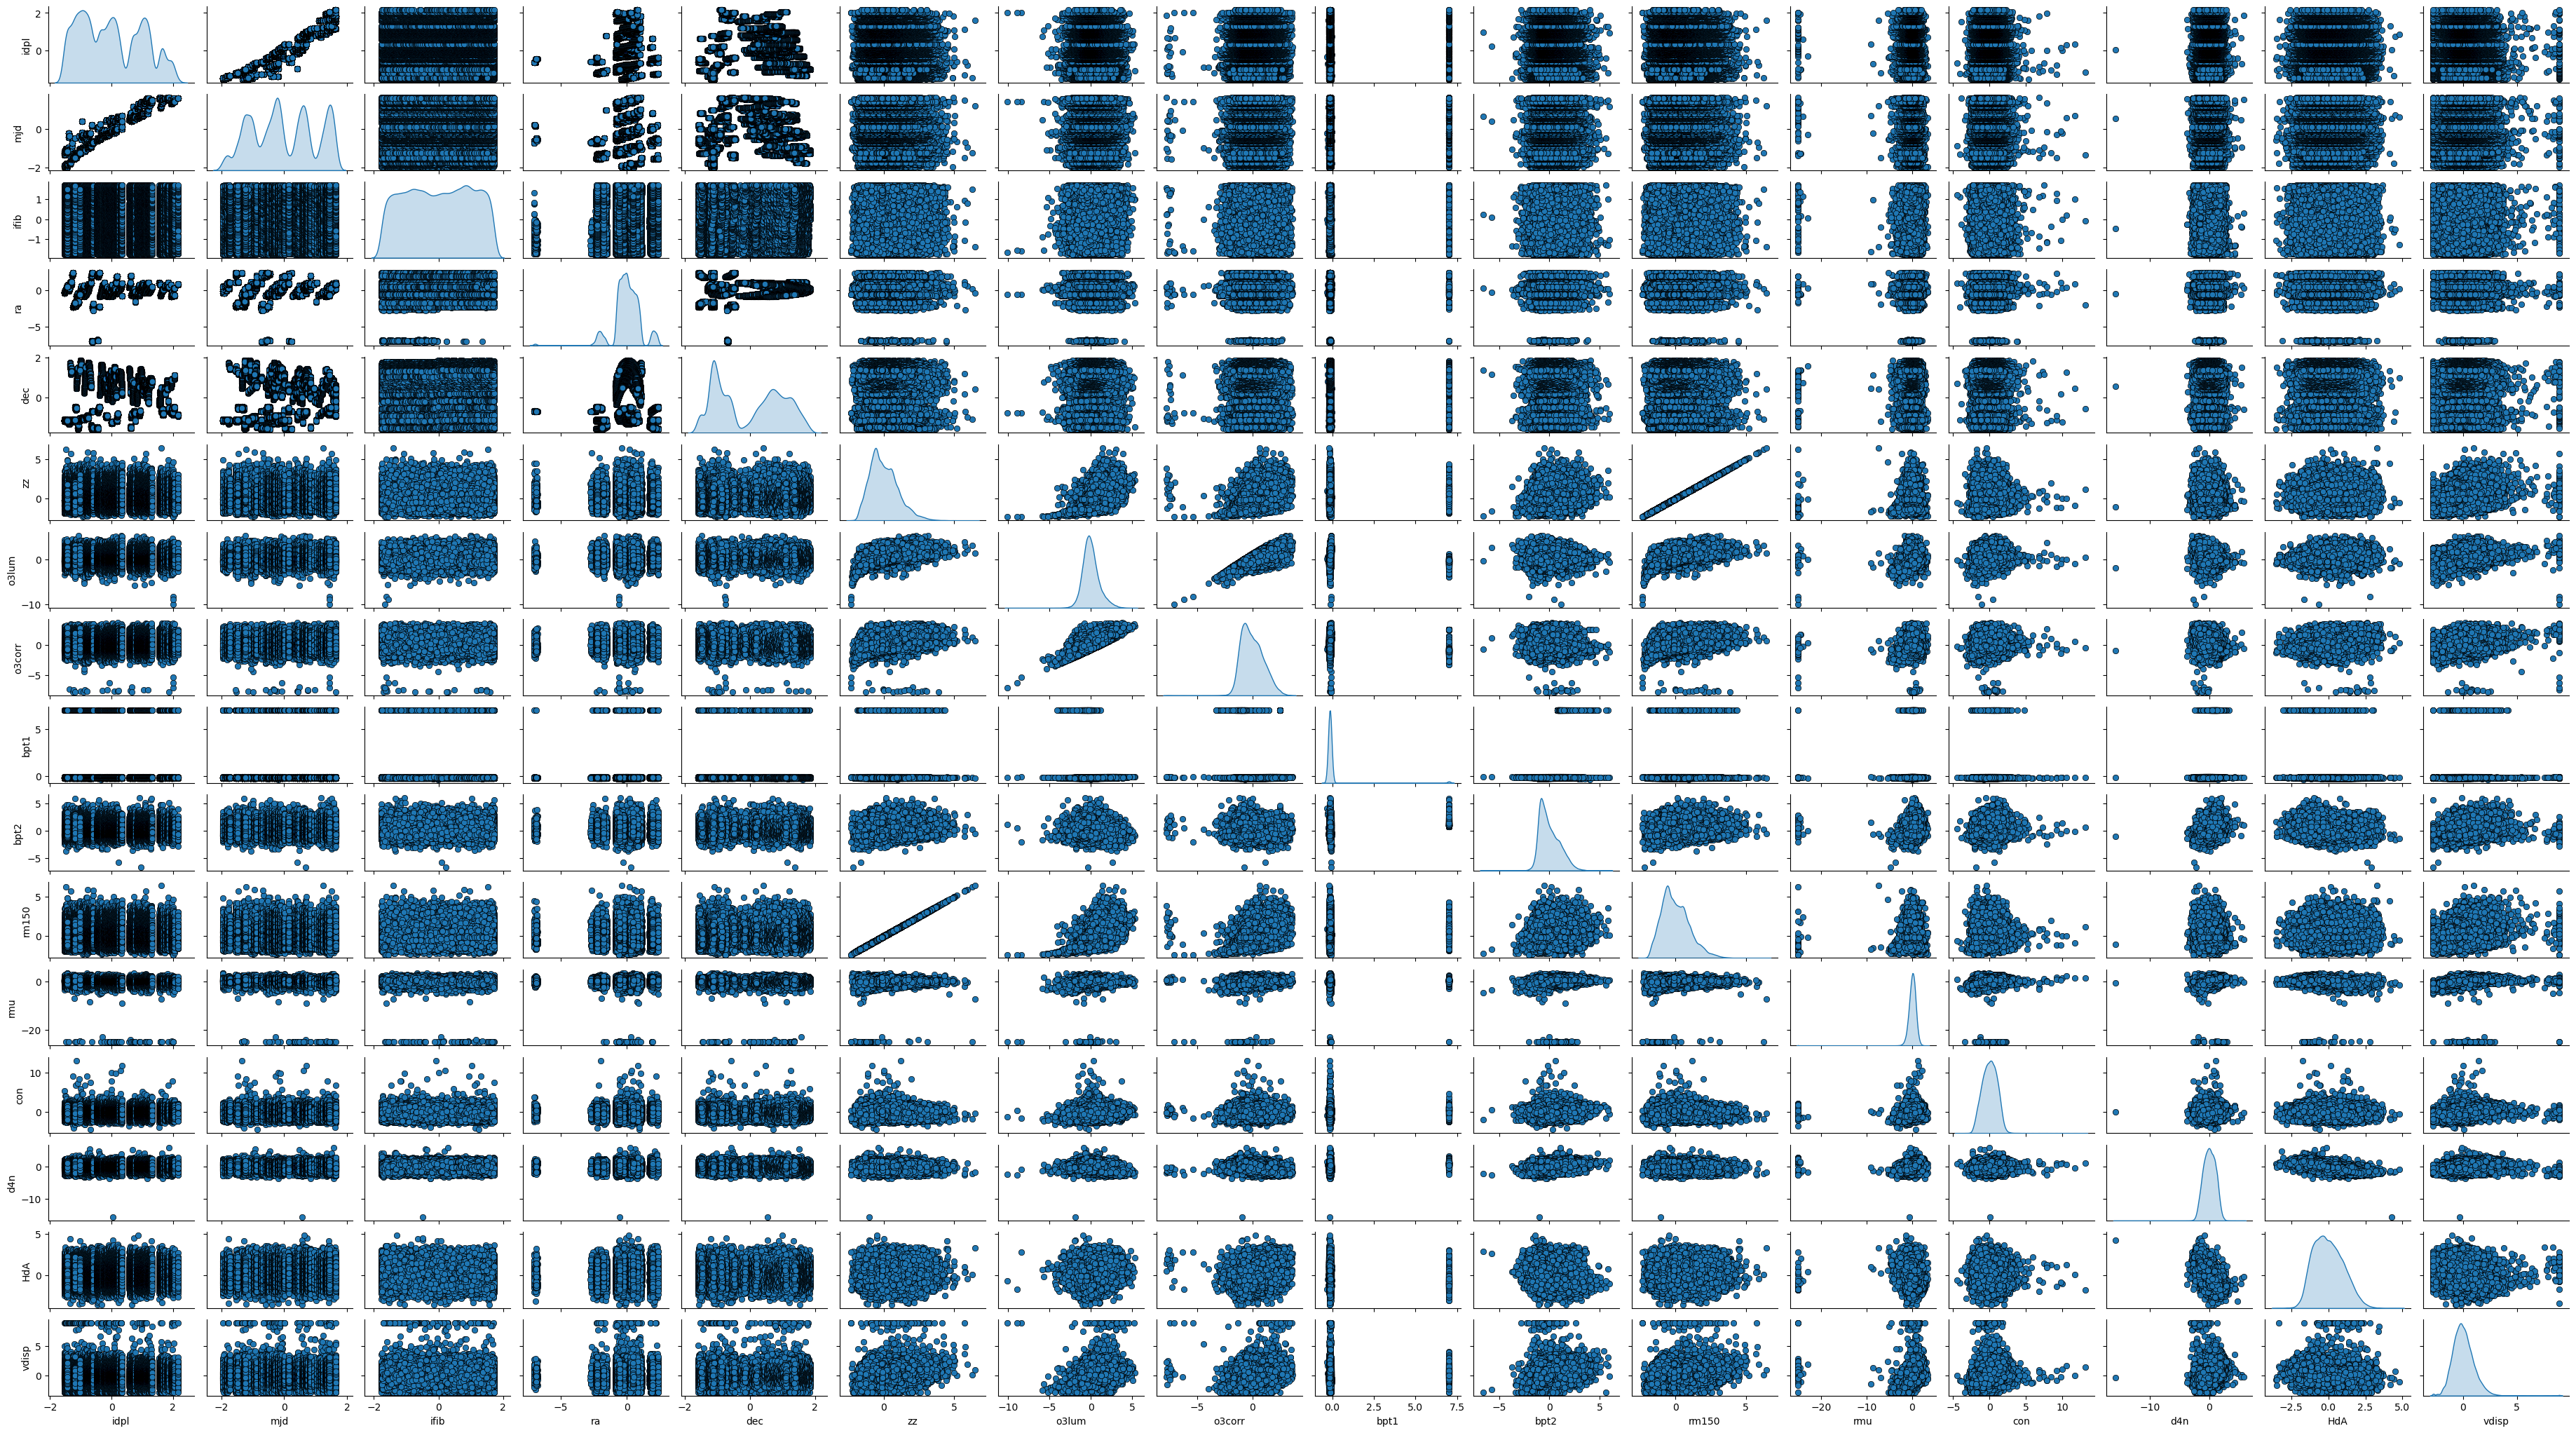

In [9]:
pp = sns.pairplot(AGN[name], height=1.3, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True))

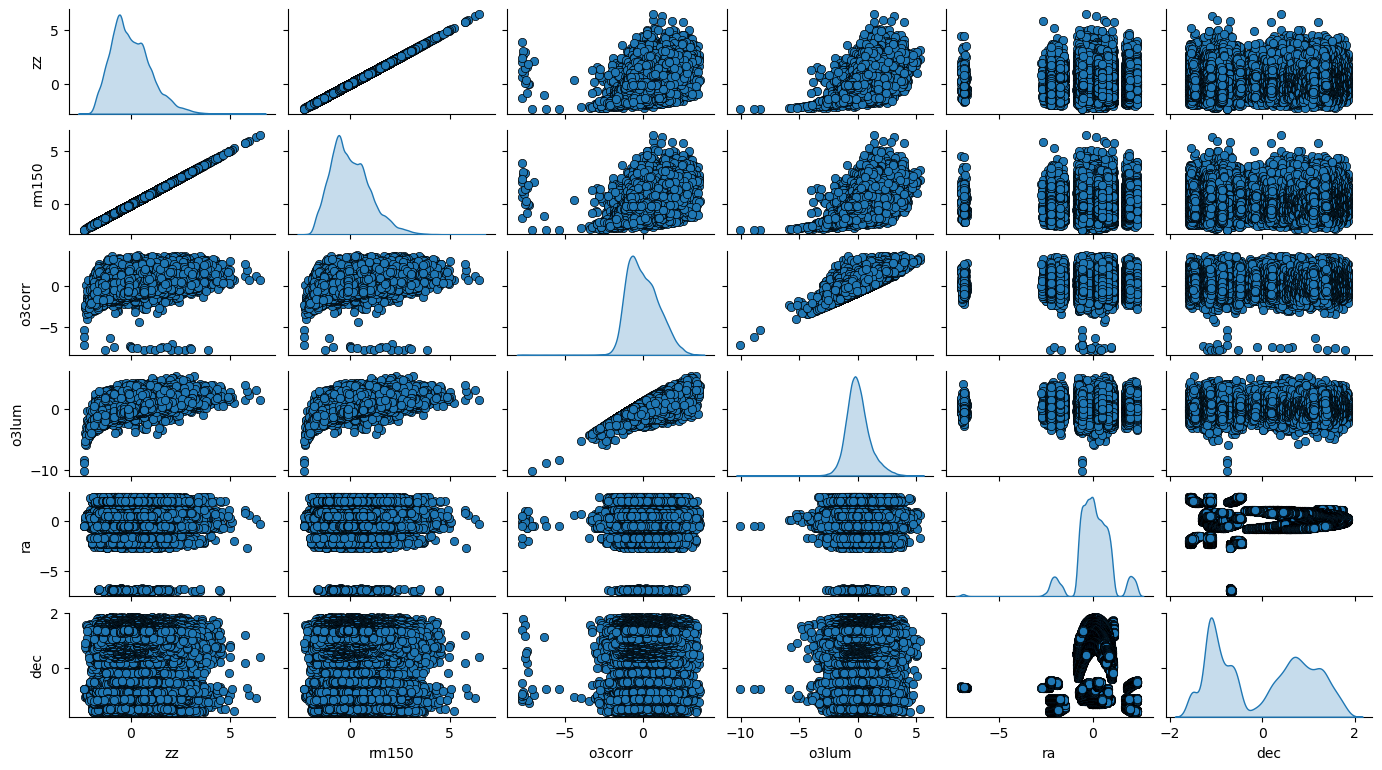

In [10]:
#Al tener demasiadas variables la visualización no es efectiva
#Elegimos un subconjunto de variables para visualizar
cols = ['zz', 'rm150','o3corr', 'o3lum', 'ra','dec']

sns.pairplot(AGN[cols], height=1.3, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True))

<Axes: >

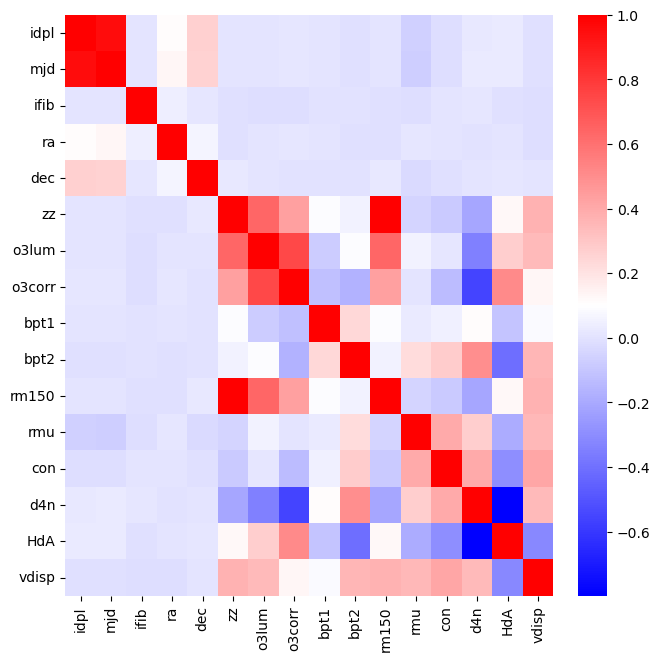

In [11]:
#otra forma de ver correlaciones es con heatmaps
fig = plt.figure(constrained_layout=True, figsize = (6.5,6.5))
sns.heatmap(AGN.corr(), cmap='bwr')

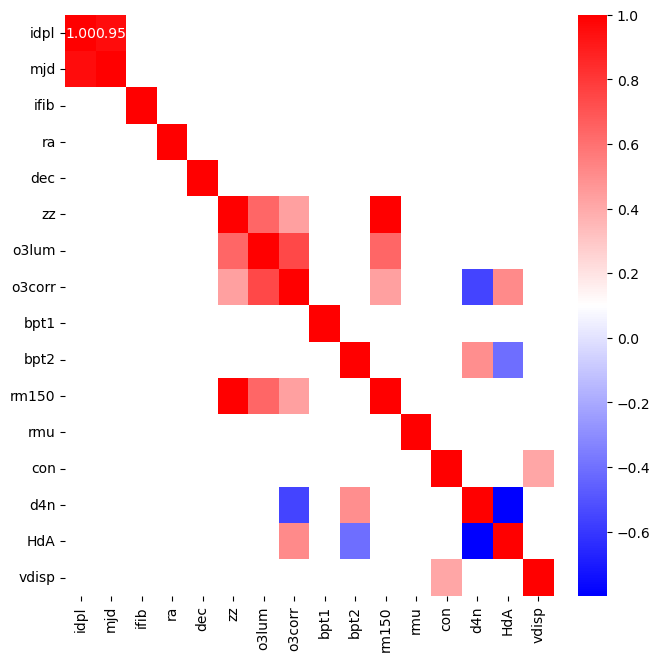

In [12]:
#Aqui visualizamos solo variables con cierto umbral de correlación
correlation_matrix = AGN.corr()

# Filtrar las correlaciones que cumplen con tu condición
filtered_correlation_matrix = correlation_matrix[(correlation_matrix > 0.4) | (correlation_matrix < -0.4)]

fig = plt.figure(constrained_layout=True, figsize=(6.5, 6.5))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="bwr")

plt.show()



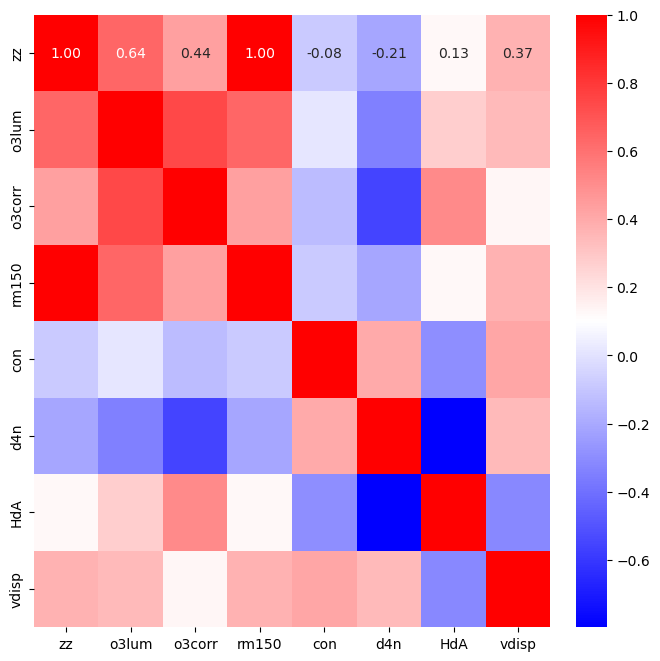

In [13]:

selected=['zz','o3lum','o3corr','rm150','con','d4n','HdA','vdisp']
filtered_correlation_matrix = AGN[selected]

#Hacmos un zoom-in a dichas variables

fig = plt.figure(constrained_layout=True, figsize=(6.5, 6.5))
sns.heatmap(filtered_correlation_matrix.corr(), annot=True, fmt=".2f", cmap="bwr")

plt.show()



In [14]:
filtered_correlation_matrix.corr()

zz     o3lum    o3corr     rm150       con       d4n       HdA  \
zz      1.000000  0.635282  0.436315  1.000000 -0.082731 -0.214486  0.125525   
o3lum   0.635282  1.000000  0.746898  0.635282  0.014548 -0.341879  0.270866   
o3corr  0.436315  0.746898  1.000000  0.436315 -0.134720 -0.553932  0.508505   
rm150   1.000000  0.635282  0.436315  1.000000 -0.082731 -0.214486  0.125525   
con    -0.082731  0.014548 -0.134720 -0.082731  1.000000  0.398758 -0.295699   
d4n    -0.214486 -0.341879 -0.553932 -0.214486  0.398758  1.000000 -0.798261   
HdA     0.125525  0.270866  0.508505  0.125525 -0.295699 -0.798261  1.000000   
vdisp   0.371056  0.342099  0.133541  0.371056  0.414022  0.340680 -0.314457   

           vdisp  
zz      0.371056  
o3lum   0.342099  
o3corr  0.133541  
rm150   0.371056  
con     0.414022  
d4n     0.340680  
HdA    -0.314457  
vdisp   1.000000

### En esta sección, haremos una reducción de dimensionalidad por PCA

In [51]:
from sklearn.decomposition import PCA
X=AGN.dropna()
PCA = PCA(n_components=10)
components = PCA.fit_transform(X)


In [52]:
s0=sum(PCA.components_[0])

In [56]:
name = ['idpl', 'mjd', 'ifib', 'ra', 'dec', 'zz', 'o3lum', 'o3corr','bpt1','bpt2', 'rm150','rmu','con','d4n','HdA','vdisp']
Y = PCA.components_[0]
# Usanmos zip para combinar los arrays name y Y
nuevo_objeto = list(zip(name, Y))

# Ordenamos la lista basada en los valores numéricos de Y
nuevo_objeto_ordenado = sorted(nuevo_objeto, key=lambda x: x[1])

# Lo convertimos en un diccionario
nuevo_diccionario_ordenado = dict(nuevo_objeto_ordenado)

print(nuevo_objeto_ordenado)
print(nuevo_diccionario_ordenado)


[('d4n', -0.39670160271624105), ('con', -0.18246144993304161), ('bpt2', -0.16398282097038178), ('rmu', -0.11425525677098186), ('bpt1', -0.05747362039551631), ('ifib', -0.009970008242275542), ('ra', 0.003742958884976847), ('dec', 0.012460721188056481), ('mjd', 0.01785958464921549), ('idpl', 0.018349596818309076), ('vdisp', 0.022409111506918267), ('HdA', 0.3494538849598254), ('zz', 0.38320568485545425), ('rm150', 0.38320568485545425), ('o3lum', 0.40423062104035334), ('o3corr', 0.4306363706667189)]
{'d4n': -0.39670160271624105, 'con': -0.18246144993304161, 'bpt2': -0.16398282097038178, 'rmu': -0.11425525677098186, 'bpt1': -0.05747362039551631, 'ifib': -0.009970008242275542, 'ra': 0.003742958884976847, 'dec': 0.012460721188056481, 'mjd': 0.01785958464921549, 'idpl': 0.018349596818309076, 'vdisp': 0.022409111506918267, 'HdA': 0.3494538849598254, 'zz': 0.38320568485545425, 'rm150': 0.38320568485545425, 'o3lum': 0.40423062104035334, 'o3corr': 0.4306363706667189}


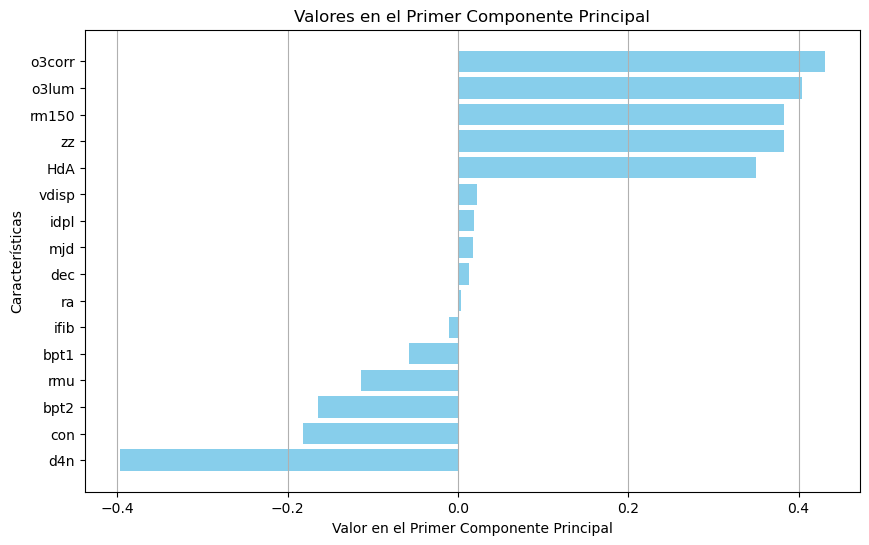

In [57]:
import matplotlib.pyplot as plt

# Extraemos las características y los valores asignados en el primer componente principal
caracteristicas = list(nuevo_diccionario_ordenado.keys())
valores = list(nuevo_diccionario_ordenado.values())

# Gráfica de barras
plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, valores, color='skyblue')
plt.xlabel('Valor en el Primer Componente Principal')
plt.ylabel('Características')
plt.title('Valores en el Primer Componente Principal')
plt.grid(axis='x')
plt.show()


In [55]:
X

idpl       mjd      ifib        ra       dec        zz     o3lum  \
0     -1.537489 -1.898415 -1.766827 -0.407994 -1.197295 -1.878785 -1.687155   
1     -1.537489 -1.898415 -1.750457 -0.409111 -1.185186 -0.907076 -0.848796   
2     -1.537489 -1.898415 -1.701347 -0.404744 -1.184932 -0.181763 -0.210183   
3     -1.537489 -1.898415 -1.635866 -0.404841 -1.166646  0.660370  0.350047   
4     -1.537489 -1.898415 -1.575842 -0.399971 -1.150370 -1.277901 -0.523349   
...         ...       ...       ...       ...       ...       ...       ...   
88173 -1.022869 -1.224788  1.348957 -0.541612  1.350332 -0.105002 -0.159795   
88174 -1.022869 -1.224788  1.376240 -0.547108  1.361882 -0.116863 -1.109767   
88175 -1.022869 -1.224788  1.479918 -0.552169  1.399564 -0.118877 -0.861438   
88176 -1.022869 -1.224788  1.485375 -0.554972  1.381303 -0.136780 -0.038430   
88177 -1.022869 -1.224788  1.512658 -0.533608  1.350205  0.902962  0.874519   

         o3corr      bpt1      bpt2     rm150       rmu       con       d4n  \
0     -1.261488 -0.166143 -1.131707 -1.878785  0.950828  0.568563 -0.296486   
1     -0.837759 -0.156555 -1.017719 -0.907076  0.605760  0.687348  0.186270   
2      0.064221 -0.109772 -0.048822 -0.181763 -0.478432  0.762786 -0.924925   
3     -0.338759 -0.154292  0.071435  0.660370  0.665519  0.721126  0.654743   
4      0.314240 -0.162694 -0.032294 -1.277901  0.022173  0.092293 -1.144403   
...         ...       ...       ...       ...       ...       ...       ...   
88173  0.020189 -0.158877 -0.811401 -0.105002 -0.214004 -0.715000 -0.682595   
88174 -0.338759 -0.155102 -0.559488 -0.116863 -1.247493  0.553081 -1.091557   
88175 -0.144992 -0.171943 -0.886633 -0.118877  0.437511 -0.489532 -0.179368   
88176 -0.620477 -0.150171 -0.883213 -0.136780  1.477885  0.247109  1.739277   
88177  0.746845 -0.114602  0.746814  0.902962  0.650408 -0.078004  0.486683   

            HdA     vdisp  
0      0.571546  0.100448  
1     -0.635132 -0.172569  
2      0.633828 -1.355638  
3     -1.040862  1.658196  
4      0.950520 -0.734316  
...         ...       ...  
88173  1.075264  0.169092  
88174  1.139515  0.630893  
88175  0.617631 -0.364172  
88176 -1.666282  2.066516  
88177 -0.385375  1.084863  

[88092 rows x 16 columns]

In [33]:
AGN

idpl       mjd      ifib        ra       dec        zz     o3lum  \
0     -1.537489 -1.898415 -1.766827 -0.407994 -1.197295 -1.878785 -1.687155   
1     -1.537489 -1.898415 -1.750457 -0.409111 -1.185186 -0.907076 -0.848796   
2     -1.537489 -1.898415 -1.701347 -0.404744 -1.184932 -0.181763 -0.210183   
3     -1.537489 -1.898415 -1.635866 -0.404841 -1.166646  0.660370  0.350047   
4     -1.537489 -1.898415 -1.575842 -0.399971 -1.150370 -1.277901 -0.523349   
...         ...       ...       ...       ...       ...       ...       ...   
88173 -1.022869 -1.224788  1.348957 -0.541612  1.350332 -0.105002 -0.159795   
88174 -1.022869 -1.224788  1.376240 -0.547108  1.361882 -0.116863 -1.109767   
88175 -1.022869 -1.224788  1.479918 -0.552169  1.399564 -0.118877 -0.861438   
88176 -1.022869 -1.224788  1.485375 -0.554972  1.381303 -0.136780 -0.038430   
88177 -1.022869 -1.224788  1.512658 -0.533608  1.350205  0.902962  0.874519   

         o3corr      bpt1      bpt2     rm150       rmu       con       d4n  \
0     -1.261488 -0.166143 -1.131707 -1.878785  0.950828  0.568563 -0.296486   
1     -0.837759 -0.156555 -1.017719 -0.907076  0.605760  0.687348  0.186270   
2      0.064221 -0.109772 -0.048822 -0.181763 -0.478432  0.762786 -0.924925   
3     -0.338759 -0.154292  0.071435  0.660370  0.665519  0.721126  0.654743   
4      0.314240 -0.162694 -0.032294 -1.277901  0.022173  0.092293 -1.144403   
...         ...       ...       ...       ...       ...       ...       ...   
88173  0.020189 -0.158877 -0.811401 -0.105002 -0.214004 -0.715000 -0.682595   
88174 -0.338759 -0.155102 -0.559488 -0.116863 -1.247493  0.553081 -1.091557   
88175 -0.144992 -0.171943 -0.886633 -0.118877  0.437511 -0.489532 -0.179368   
88176 -0.620477 -0.150171 -0.883213 -0.136780  1.477885  0.247109  1.739277   
88177  0.746845 -0.114602  0.746814  0.902962  0.650408 -0.078004  0.486683   

            HdA     vdisp  
0      0.571546  0.100448  
1     -0.635132 -0.172569  
2      0.633828 -1.355638  
3     -1.040862  1.658196  
4      0.950520 -0.734316  
...         ...       ...  
88173  1.075264  0.169092  
88174  1.139515  0.630893  
88175  0.617631 -0.364172  
88176 -1.666282  2.066516  
88177 -0.385375  1.084863  

[88178 rows x 16 columns]

In [34]:
cumVar = pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4",4:"PC5",5:"PC6",6:"PC7",7:"PC8",8:"PC9",9:"PC10"})

VarPerc  cumVarPerc
PC1   22.168168   22.168168
PC2   17.705083   39.873251
PC3   13.272225   53.145476
PC4    7.875486   61.020961
PC5    6.434903   67.455864
PC6    5.952294   73.408158
PC7    5.618581   79.026739
PC8    5.472235   84.498974
PC9    4.265609   88.764583
PC10   3.711629   92.476212

In [35]:
from sklearn.decomposition import PCA
X_sel=AGN[selected].dropna()
PCA_sel = PCA(n_components=2)
components_sel = PCA_sel.fit_transform(X_sel)

In [36]:
X_sel

zz     o3lum    o3corr     rm150       con       d4n       HdA  \
0     -1.878785 -1.687155 -1.261488 -1.878785  0.568563 -0.296486  0.571546   
1     -0.907076 -0.848796 -0.837759 -0.907076  0.687348  0.186270 -0.635132   
2     -0.181763 -0.210183  0.064221 -0.181763  0.762786 -0.924925  0.633828   
3      0.660370  0.350047 -0.338759  0.660370  0.721126  0.654743 -1.040862   
4     -1.277901 -0.523349  0.314240 -1.277901  0.092293 -1.144403  0.950520   
...         ...       ...       ...       ...       ...       ...       ...   
88173 -0.105002 -0.159795  0.020189 -0.105002 -0.715000 -0.682595  1.075264   
88174 -0.116863 -1.109767 -0.338759 -0.116863  0.553081 -1.091557  1.139515   
88175 -0.118877 -0.861438 -0.144992 -0.118877 -0.489532 -0.179368  0.617631   
88176 -0.136780 -0.038430 -0.620477 -0.136780  0.247109  1.739277 -1.666282   
88177  0.902962  0.874519  0.746845  0.902962 -0.078004  0.486683 -0.385375   

          vdisp  
0      0.100448  
1     -0.172569  
2     -1.355638  
3      1.658196  
4     -0.734316  
...         ...  
88173  0.169092  
88174  0.630893  
88175 -0.364172  
88176  2.066516  
88177  1.084863  

[88092 rows x 8 columns]

In [37]:
components_sel

array([[-2.73711244,  1.26679032],
       [-1.89026735,  0.00732347],
       [ 0.02707073,  1.25357045],
       ...,
       [-0.29426366,  0.91901468],
       [-1.2785452 , -2.68058646],
       [ 1.36201563, -1.4908563 ]])

In [38]:
cumVar = pd.DataFrame(np.cumsum(PCA_sel.explained_variance_ratio_)*100, 
                      columns=["cumVarPerc"])
expVar = pd.DataFrame(PCA_sel.explained_variance_ratio_*100, columns=["VarPerc"])
pd.concat([expVar, cumVar], axis=1)\
    .rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4",4:"PC5",5:"PC6",6:"PC7",7:"PC8",8:"PC9",9:"PC10"})

VarPerc  cumVarPerc
PC1  43.400644   43.400644
PC2  28.660212   72.060856

<Axes: xlabel='PC1', ylabel='PC2'>

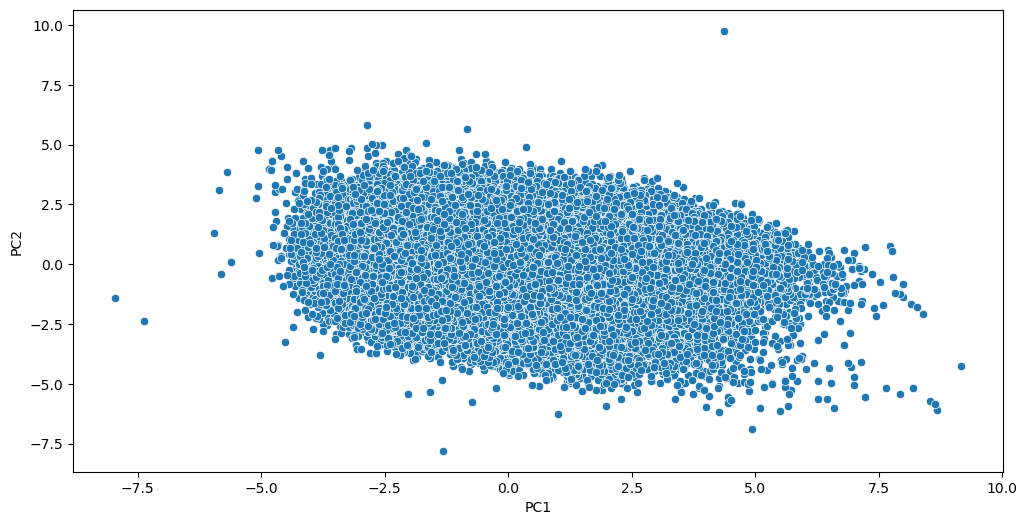

In [39]:
componentsDf = pd.DataFrame(data = components_sel, columns = ['PC1', 'PC2'])
pcaDf = pd.concat([componentsDf], axis=1)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2")

In [40]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

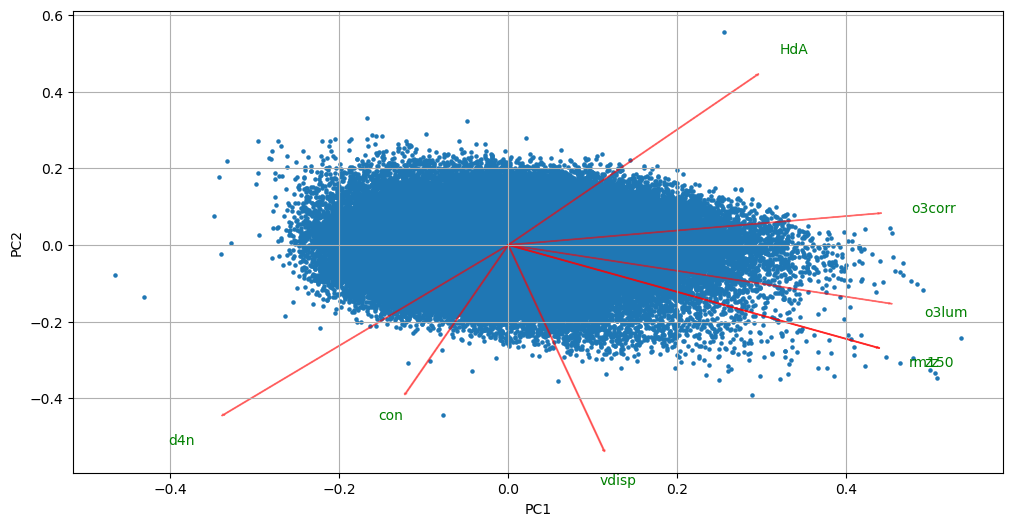

In [41]:
plt.figure(figsize=(12, 6))
biplot(components_sel, np.transpose(PCA_sel.components_), list(AGN[selected].columns))

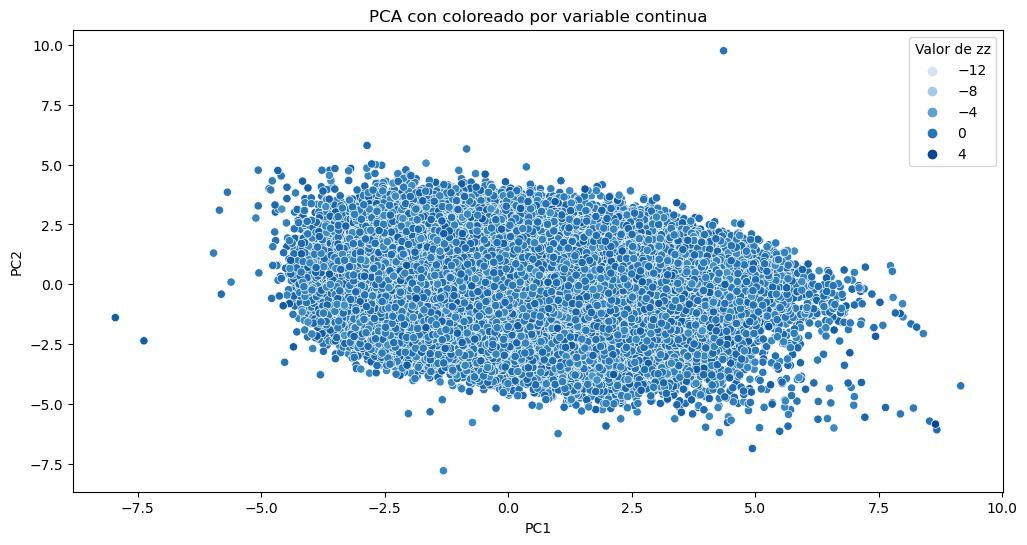

In [62]:


# Creamos un df con las componentes principales
componentsDf = pd.DataFrame(data=components_sel, columns=['PC1', 'PC2'])

pcaDf = pd.concat([componentsDf, AGN['d4n']], axis=1)

# Graficamos los datos coloreados por 'zz'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pcaDf, x="PC1", y="PC2", hue="d4n", palette="Blues")  # Ajusta el nombre de la columna 'zz' y el mapa de colores según necesites
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA con coloreado por variable continua')
plt.legend(title='Valor de zz')
plt.show()


In [45]:
AGN['zz'].describe()

count    8.811300e+04
mean    -1.383781e-16
std      1.000006e+00
min     -2.351883e+00
25%     -7.311744e-01
50%     -1.390182e-01
75%      6.174019e-01
max      6.475854e+00
Name: zz, dtype: float64